<h1>Problem 2: [25 points]</h1>
Next, your implementation should handle (1 + ε)-approximate nearest neighbor queries. 
Consider different values of ε = {0.05, 0.1, 0.15, 0.2, 0.25}. Run the ε-NN queries considering 
the following queries: q₀ = (500, 500), q₁ = (1000, 1000), q₃ = (30, 950), q₄ = (0, 1020). For 
each of these queries, create a figure that has the different values of ε on the x-axis, and the 
distance of q with the point returned by your data structure on the y-axis.

Next, fix ε = 0.1 and run 1000 random queries in the box [0, 1000] × [0, 1000]. Show the 
average query time and the average distance of the query with the point returned by you 
data structure. Explain the results.

Next, fix ε = 0.1 and run 1000 random queries in the box [1000, 1500] × [1000, 1500]. 
Show the average query time and the average distance of the query with the point returned 
by you data structure. Explain the results.

In [1]:
#Question 2
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt 
import time


In [2]:
class QuadNode:
    def __init__(self, center, width):
        self.center = center
        self.width = width
        self.point = None
        self.children = None

    def get_diam(self):
        return 2 * self.width



In [3]:
class QuadTree:
    def __init__(self, points):
        self.dim = points.shape[1]
        self.points = points
        self.min_pt = np.min(points, axis=0)
        self.max_pt = np.max(points, axis=0)
        self.center = (self.min_pt + self.max_pt) / 2
        self.width = np.max(self.max_pt - self.min_pt) / 2
        self.root = self.build_tree(points, self.center, self.width)

    def build_tree(self, points, center, width):
        node = QuadNode(center, width)
        if len(points) == 1:
            node.point = points[0]
            return node
        if len(points) == 0:
            return node

        node.children = []
        for i in range(2 ** self.dim):
            child_center = center.copy()
            for d in range(self.dim):
                offset = width / 2 if (i & (1 << d)) else -width / 2
                child_center[d] += offset

            mask = np.ones(len(points), dtype=bool)
            for d in range(self.dim):
                if i & (1 << d):
                    mask &= points[:, d] >= center[d]
                else:
                    mask &= points[:, d] < center[d]

            child_pts = points[mask]
            node.children.append(self.build_tree(child_pts, child_center, width/2))

        return node

    def ann_search(self, query, eps):
        Q = Queue()
        Q.put(self.root)
        curr_pt = self.root.point if self.root.point is not None else None
        curr_dist = float('inf') if curr_pt is None else np.linalg.norm(query - curr_pt)

        while not Q.empty():
            u = Q.get()

            if u.point is not None:
                dist = np.linalg.norm(query - u.point)
                if dist < curr_dist:
                    curr_dist = dist
                    curr_pt = u.point

            if u.children is not None:
                cell_dist = np.linalg.norm(query - u.center)
                if cell_dist - u.get_diam() <= (2 - eps/2) * curr_dist:
                    for child in u.children:
                        Q.put(child)

        return curr_pt, curr_dist



q0, ε=0.05: dist=2.26, point=[497.76 499.7 ]
q0, ε=0.10: dist=2.26, point=[497.76 499.7 ]
q0, ε=0.15: dist=2.26, point=[497.76 499.7 ]
q0, ε=0.20: dist=2.26, point=[497.76 499.7 ]
q0, ε=0.25: dist=2.26, point=[497.76 499.7 ]
q1, ε=0.05: dist=14.78, point=[991.73 987.75]
q1, ε=0.10: dist=14.78, point=[991.73 987.75]
q1, ε=0.15: dist=14.78, point=[991.73 987.75]
q1, ε=0.20: dist=14.78, point=[991.73 987.75]
q1, ε=0.25: dist=14.78, point=[991.73 987.75]
q2, ε=0.05: dist=10.29, point=[ 27.11 940.12]
q2, ε=0.10: dist=10.29, point=[ 27.11 940.12]
q2, ε=0.15: dist=10.29, point=[ 27.11 940.12]
q2, ε=0.20: dist=10.29, point=[ 27.11 940.12]
q2, ε=0.25: dist=10.29, point=[ 27.11 940.12]
q3, ε=0.05: dist=31.46, point=[ 13.14 991.42]
q3, ε=0.10: dist=31.46, point=[ 13.14 991.42]
q3, ε=0.15: dist=31.46, point=[ 13.14 991.42]
q3, ε=0.20: dist=31.46, point=[ 13.14 991.42]
q3, ε=0.25: dist=31.46, point=[ 13.14 991.42]


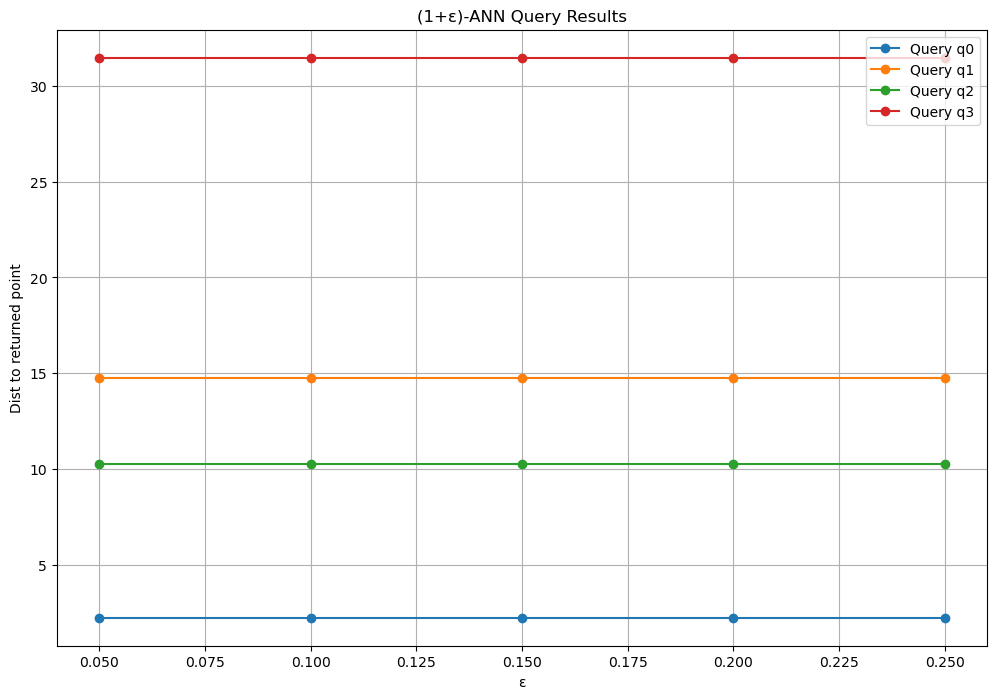

In [4]:
points = np.loadtxt('Pquad.txt', skiprows=1, delimiter=',')
tree = QuadTree(points)

queries = {
    'q0': np.array([500, 500]),
    'q1': np.array([1000, 1000]),
    'q2': np.array([30, 950]),
    'q3': np.array([0, 1020])
}

epsilons = [0.05, 0.1, 0.15, 0.2, 0.25]
results = {}

for query_name, query_pt in queries.items():
    query_results = []
    for eps in epsilons:
        result, dist = tree.ann_search(query_pt, eps)
        query_results.append((eps, dist))
        print(f"{query_name}, ε={eps:.2f}: dist={dist:.2f}, point={result}")
    results[query_name] = query_results

plt.figure(figsize=(12, 8))
for query_name, query_results in results.items():
    dists = [dist for _, dist in query_results]
    plt.plot(epsilons, dists, marker='o', label=f'Query {query_name}')

plt.xlabel('ε')
plt.ylabel('Dist to returned point')
plt.title('(1+ε)-ANN Query Results')
plt.legend()
plt.grid(True)
plt.show()



In [5]:
np.random.seed(42)
num_queries = 1000
eps = 0.1
queries1 = np.random.uniform(0, 1000, size=(num_queries, 2))

query_times1 = []
dists1 = []

for query in queries1:
    start_time = time.time()
    _, dist = tree.ann_search(query, eps)
    query_time = time.time() - start_time
    query_times1.append(query_time)
    dists1.append(dist)

print("\nResults for [0,1000]×[0,1000]:")
print(f"Avg query time: {np.mean(query_times1)*1000:.2f} ms")
print(f"Avg dist: {np.mean(dists1):.2f}")
print(f"Min dist: {min(dists1):.2f}")
print(f"Max dist: {max(dists1):.2f}")



Results for [0,1000]×[0,1000]:
Avg query time: 56.43 ms
Avg dist: 4.96
Min dist: 0.19
Max dist: 16.41


In [6]:

queries2 = np.random.uniform(1000, 1500, size=(num_queries, 2))
query_times2 = []
dists2 = []

for query in queries2:
    start_time = time.time()
    _, dist = tree.ann_search(query, eps)
    query_time = time.time() - start_time
    query_times2.append(query_time)
    dists2.append(dist)

print("\nResults for [1000,1500]×[1000,1500]:")
print(f"Avg query time: {np.mean(query_times2)*1000:.2f} ms")
print(f"Avg dist: {np.mean(dists2):.2f}")
print(f"Min dist: {min(dists2):.2f}")
print(f"Max dist: {max(dists2):.2f}")


Results for [1000,1500]×[1000,1500]:
Avg query time: 115.23 ms
Avg dist: 389.91
Min dist: 19.50
Max dist: 700.64
